In [1]:
import os
from PIL import Image
from collections import Counter
import shutil
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import load_img, img_to_array
from io import BytesIO
import requests
import random

2025-06-14 17:49:15.107442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749898155.253226    8125 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749898155.306511    8125 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749898155.580273    8125 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749898155.580397    8125 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749898155.580402    8125 computation_placer.cc:177] computation placer alr

In [ ]:
#import dataset from kaggle.com

In [ ]:
# !pip install kagglehub

In [4]:
os.getcwd()

'/mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/main_program'

In [ ]:
# import kagglehub
# path_download = kagglehub.dataset_download("alessiocorrado99/animals10")
# print("Path to dataset files:", path_download)

In [9]:
mypath= '/mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/raw pictures'

In [ ]:
#lable distribution

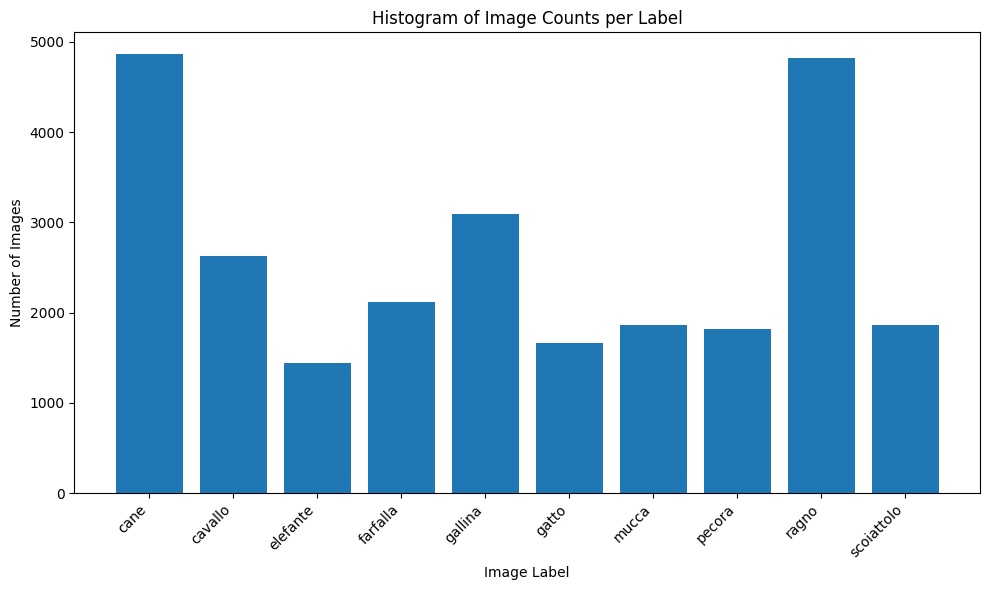

In [10]:
image_counts = {}
for cls in os.listdir(mypath):
    n_files = len(os.listdir(os.path.join(mypath, cls)))
    image_counts[cls] = n_files

plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel("Image Label")
plt.ylabel("Number of Images")
plt.title("Histogram of Image Counts per Label")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#Copy train image class to folder

In [11]:
selected_labels = ['farfalla', 'gatto', 'pecora', 'scoiattolo']

selected_label_destination_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/pre-test images/'

os.makedirs(selected_label_destination_dir, exist_ok=True)

for cls in os.listdir(mypath):
    # Check if the class is one of the selected labels
    if cls in selected_labels:
        source_class_dir = os.path.join(mypath, cls)
        destination_class_dir = os.path.join(selected_label_destination_dir, cls)

        os.makedirs(destination_class_dir, exist_ok=True)

        for fname in os.listdir(source_class_dir):
            source_fpath = os.path.join(source_class_dir, fname)
            destination_fpath = os.path.join(destination_class_dir, fname)
            shutil.copy2(source_fpath, destination_fpath)

print(f"succesful copied image {selected_labels} to {selected_label_destination_dir}")

succesful copied image ['farfalla', 'gatto', 'pecora', 'scoiattolo'] to mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/pre-test images/


In [ ]:
#open example image founded

Pictures found: 7462


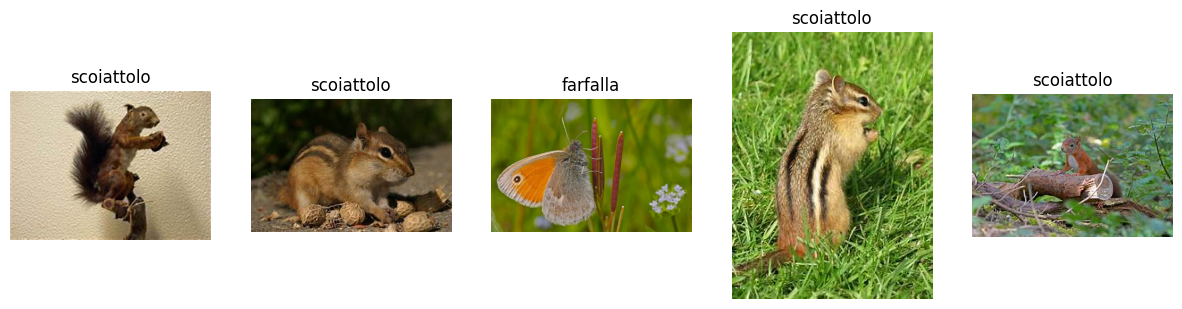

In [12]:
dataset_dir = selected_label_destination_dir

# Collect all of the images and labels files
image_files = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            label = os.path.basename(root)  # ambil nama folder sebagai label
            file_path = os.path.join(root, file)
            image_files.append((file_path, label))

print(f"Pictures found: {len(image_files)}")

# Take 5 random images
random_images = random.sample(image_files, 5)

# image show
plt.figure(figsize=(15, 5))
for i, (img_path, label) in enumerate(random_images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(label)  # labels = folder name
    plt.axis('off')

plt.show()

In [ ]:
#Show total images perlabels

In [13]:
total_images = sum(len(files) for root, dirs, files in os.walk(selected_label_destination_dir) if root != selected_label_destination_dir)

image_counts_selected = {}
for label in selected_labels:
  label_dir = os.path.join(selected_label_destination_dir, label)
  if os.path.exists(label_dir):
    image_counts_selected[label] = len(os.listdir(label_dir))

print(f"Images from selected labels: {total_images}")
print("\nImages perlabels:")
for label, count in image_counts_selected.items():
  print(f"{label}: {count}")

Images from selected labels: 7462

Images perlabels:
farfalla: 2112
gatto: 1668
pecora: 1820
scoiattolo: 1862


In [ ]:
#Resolution distribution from selected label


Commonly appeared resolution (top 5):
(300, 225): 1080 pictures
(300, 200): 916 pictures
(640, 426): 475 pictures
(300, 300): 304 pictures
(300, 169): 293 pictures


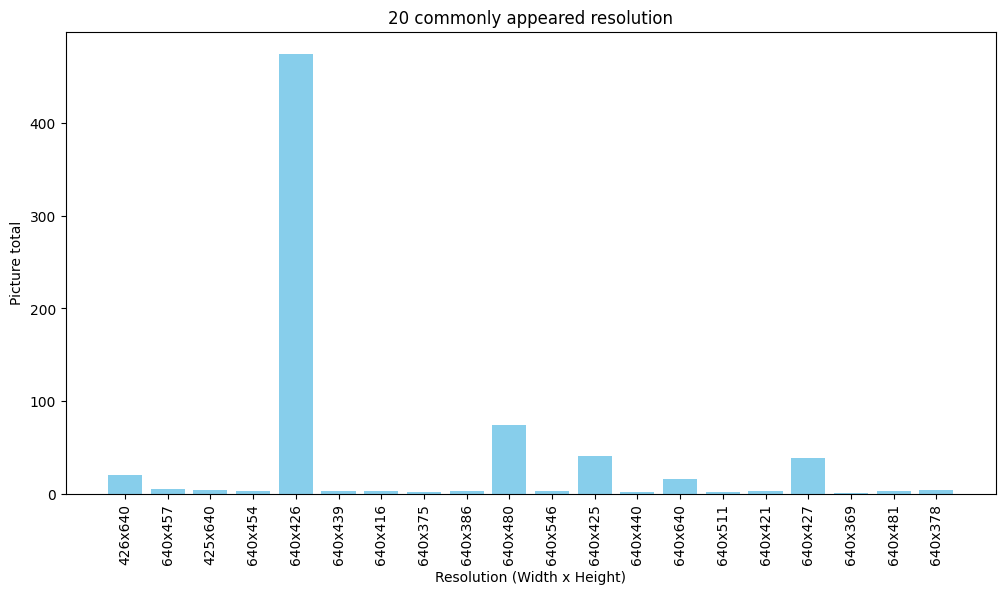

In [14]:
size_counter = Counter()
for cls in os.listdir(selected_label_destination_dir):
    for fname in os.listdir(os.path.join(selected_label_destination_dir, cls)):
        fpath = os.path.join(selected_label_destination_dir, cls, fname)
        try:
            with Image.open(fpath) as img:
                size_counter[img.size] += 1
        except:
            continue

# Show 5 commonly resolution
print("\nCommonly appeared resolution (top 5):")
for size, count in size_counter.most_common(5):
    print(f"{size}: {count} pictures")

# Ubah (width, height) jadi string label resolusi
res_labels = [f'{w}x{h}' for (w, h) in size_counter.keys()]
counts = list(size_counter.values())

plt.figure(figsize=(12, 6))
plt.bar(res_labels[:20], counts[:20], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Resolution (Width x Height)')
plt.ylabel('Picture total')
plt.title('20 commonly appeared resolution')
plt.show()

In [ ]:
#Data preprocessing

In [ ]:
#Rezising image resolution

In [15]:
final_datasets_dir = selected_label_destination_dir
output_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/preprocess image/'

target_size = (150, 150) 

# Making output folder
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir, exist_ok=True)

# Preprocessing (resize + resaving)
for cls in tqdm(os.listdir(final_datasets_dir)):
    cls_input = os.path.join(final_datasets_dir, cls)
    cls_output = os.path.join(output_dir, cls)
    os.makedirs(cls_output, exist_ok=True)

    for fname in os.listdir(cls_input):
        fpath = os.path.join(cls_input, fname)
        try:
            with Image.open(fpath) as img:
                img = img.convert('RGB')       # makesure 3 channel
                img = img.resize(target_size)  # resize
                img.save(os.path.join(cls_output, fname))
        except:
            continue

print("Images rezised.")

100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:01<00:00, 45.39s/it]

Images rezised.


In [ ]:
#split dataset

In [16]:
# Split train/val/test
classes = os.listdir(output_dir)
train_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/train/'
val_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/val/'
test_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/test/'

for d in [train_dir, val_dir, test_dir]:
    if os.path.exists(d):
        shutil.rmtree(d)
    os.makedirs(d, exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(d, cls), exist_ok=True)

# Split data per kelas
for cls in classes:
    cls_path = os.path.join(output_dir, cls)
    files = os.listdir(cls_path)
    train_files, valtest_files = train_test_split(files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(valtest_files, test_size=0.5, random_state=42)

    for f in train_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(train_dir, cls, f))
    for f in val_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(val_dir, cls, f))
    for f in test_files:
        shutil.copy(os.path.join(cls_path, f), os.path.join(test_dir, cls, f))

print("Dataset splited train/val/test.")

# 7️ (Optional) checking the total for each class
for split_dir in [train_dir, val_dir, test_dir]:
    print(f"\n📁 {split_dir}")
    for cls in os.listdir(split_dir):
        n_files = len(os.listdir(os.path.join(split_dir, cls)))
        print(f"  - {cls}: {n_files} images")

Dataset splited train/val/test.

📁 mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/train/
  - farfalla: 1478 images
  - gatto: 1167 images
  - pecora: 1274 images
  - scoiattolo: 1303 images

📁 mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/val/
  - farfalla: 317 images
  - gatto: 250 images
  - pecora: 273 images
  - scoiattolo: 279 images

📁 mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/test/
  - farfalla: 317 images
  - gatto: 251 images
  - pecora: 273 images
  - scoiattolo: 280 images


In [ ]:
#Modeling

In [2]:
train_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/train/'
val_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/val/'
test_dir = 'mnt/c/Users/HERNANDES/Vs Code/Jupyter Notebook/test/'

In [7]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

In [8]:
# Siapkan data generator untuk training dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)   # Hanya rescale untuk validation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical' 
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'
)

Found 5222 images belonging to 4 classes.
Found 1119 images belonging to 4 classes.


In [9]:
## Load pretrained VGG16 tanpa FC layer
base_model = Xception(weights='imagenet', include_top=False, input_shape= (150,150,3))
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


# Ambil output layer tengah (misalnya block4_pool)
x = base_model.get_layer('block4_pool').output   

# Lanjutkan dengan Conv2D & Pooling sendiri
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

# Global average pooling + classifier head
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Model final
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

I0000 00:00:1749898558.274436    8125 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:07:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 74, 74,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 74, 74,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 72, 72,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 72, 72,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 72, 72,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 72, 72,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 72, 72,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 72, 72,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 72, 72,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 72, 72,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 36, 36,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 36, 36,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 36, 36,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 36, 36,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 36, 36,    │          0 │ add[0][0]       

 Total params: 1,135,228 (4.33 MB)

 Trainable params: 210,884 (823.77 KB)

 Non-trainable params: 924,344 (3.53 MB)

In [10]:
labels = train_generator.class_indices.keys()
print(labels)

dict_keys(['farfalla', 'gatto', 'pecora', 'scoiattolo'])


In [ ]:
#Model compiling

In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
#Setup callback

In [ ]:
# # Callback untuk stop saat akurasi > 95%
# class CustomEarlyStopping(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         train_acc = logs.get('accuracy')
#         val_acc = logs.get('val_accuracy')
#         if train_acc >= 0.95 and val_acc >= 0.95:
#             print("\n🎉 Train & Val Accuracy di  95%, training berhenti!")
#             self.model.stop_training = True

# early_stop = EarlyStopping(
#     monitor='accuracy',       # Metrik yang dipantau (bisa juga 'val_accuracy')
#     patience=5,               # Jumlah epoch yang ditunggu tanpa perbaikan
#     verbose=1,                # Tampilkan pesan saat training dihentikan
#     restore_best_weights=True # Kembalikan bobot terbaik (opsional, tapi disarankan)
# )

# # ModelCheckpoint: simpan hanya best model (val_accuracy terbaik)
# checkpoint = ModelCheckpoint(
#     'best_model.h5',        
#     monitor='val_accuracy',    
#     mode='max',
#     save_best_only=True,       
#     verbose=1
# )

# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,
#     patience=5,
#     min_lr=1e-7,
#     verbose=1
# )

# # Gabungkan callbacks
# # callbacks = [CustomEarlyStopping(), checkpoint,reduce_lr]
# callbacks = [checkpoint, reduce_lr, early_stop]

In [ ]:
# Model training

In [12]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[earlystopping]
)

/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1749898695.326488    8264 service.cc:152] XLA service 0x708a44002140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749898695.326717    8264 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-06-14 17:58:15.434144: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749898696.007792    8264 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-14 17:58:17.080253: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k2=0,k4=3,k5=3,k6=3,k7=2} for conv %cudnn-conv.19 = (f16[64,74,74,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[64,150,150,4]{3,2,1,0} %bitcast.5456, f16[32,3,3,4]{3,2,1,0} %bitcast.5466), window={size=3x3 stride=2x2}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convForward", me

 1/81 ━━━━━━━━━━━━━━━━━━━━ 15:44 12s/step - accuracy: 0.2344 - loss: 1.9844

I0000 00:00:1749898704.144182    8264 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/81 ━━━━━━━━━━━━━━━━━━━━ 39s 737ms/step - accuracy: 0.2736 - loss: 1.7264

2025-06-14 17:58:44.592765: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k2=0,k4=3,k5=3,k6=3,k7=2} for conv %cudnn-conv.19 = (f16[38,74,74,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[38,150,150,4]{3,2,1,0} %bitcast.5466, f16[32,3,3,4]{3,2,1,0} %bitcast.5476), window={size=3x3 stride=2x2}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-14 17:58:44.592850: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algor

81/81 ━━━━━━━━━━━━━━━━━━━━ 88s 950ms/step - accuracy: 0.3022 - loss: 1.5558 - val_accuracy: 0.4596 - val_loss: 1.1301
Epoch 2/50
 1/81 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5938 - loss: 1.0752

/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.5938 - loss: 1.0752 - val_accuracy: 0.4540 - val_loss: 1.1228
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 70s 858ms/step - accuracy: 0.4635 - loss: 1.1488 - val_accuracy: 0.6186 - val_loss: 0.9446
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.6562 - loss: 0.9111 - val_accuracy: 0.6204 - val_loss: 0.9441
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 70s 857ms/step - accuracy: 0.5222 - loss: 1.0303 - val_accuracy: 0.6728 - val_loss: 0.8027
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.5938 - loss: 0.9843 - val_accuracy: 0.6572 - val_loss: 0.8040
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 68s 835ms/step - accuracy: 0.6009 - loss: 0.8975 - val_accuracy: 0.7059 - val_loss: 0.7111
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.7031 - loss: 0.7296 - val_accuracy: 0.7040 - val_loss: 0.7553
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 71s 877ms/step - accuracy: 0.6414 - loss: 0.8417 - val_accuracy: 0.7932 -

In [ ]:
# Evaluate and visualization

In [14]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    shuffle=False # Important: Do not shuffle for evaluation
)

print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 1121 images belonging to 4 classes.

Evaluating the model on the test set...
14/18 ━━━━━━━━━━━━━━━━━━━━ 2s 511ms/step - accuracy: 0.8782 - loss: 0.4296

2025-06-14 18:36:42.960355: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k2=0,k4=3,k5=3,k6=3,k7=2} for conv %cudnn-conv.19 = (f16[33,74,74,32]{3,2,1,0}, u8[0]{0}) custom-call(f16[33,150,150,4]{3,2,1,0} %bitcast.1499, f16[32,3,3,4]{3,2,1,0} %bitcast.1509), window={size=3x3 stride=2x2}, dim_labels=b01f_o01i->b01f, custom_call_target="__cudnn$convForward", metadata={op_type="Conv2D" op_name="functional_1/block1_conv1_1/convolution" source_file="/home/nope/miniconda3/envs/nope_tf/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-14 18:36:42.960776: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algor

18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 589ms/step - accuracy: 0.8725 - loss: 0.4272
Test Loss: 0.4205
Test Accuracy: 0.8555


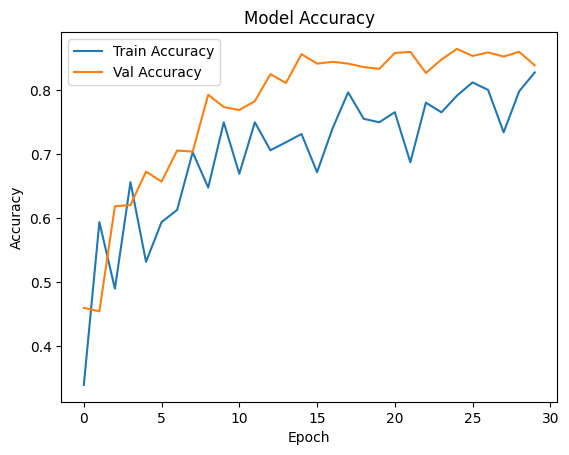

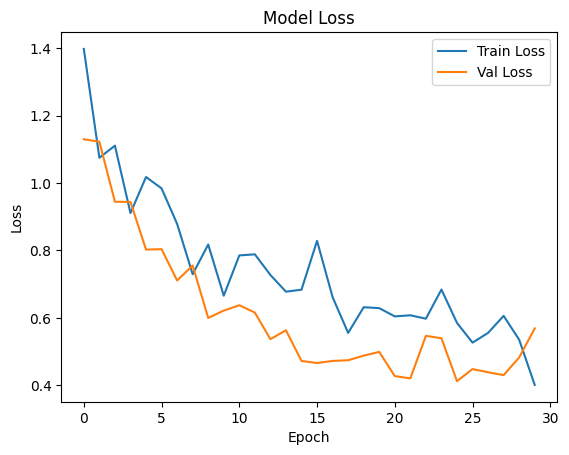

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save Model

In [17]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "Animal_Prediction"
SAVE_MODEL_NAME = "model (1).h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)    
    

Saving Model At model/Animal_Prediction/model (1).h5...
